In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("C:\\Users\\AMULYA GAJE\\Downloads\\archive\\train_u6lujuX_CVtuZ9i.csv")

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


C:\Users\AMULYA GAJE\AppData\Local\Temp\ipykernel_15668\1087220606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
C:\Users\AMULYA GAJE\AppData\Local\Temp\ipykernel_15668\1087220606.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [5]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

In [7]:
df.drop('Loan_ID',axis=1,inplace=True)
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']


In [8]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [13]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_lin=svm_linear.predict(X_test)

In [14]:
from sklearn.metrics import *
print(accuracy_score(y_pred_lin,y_test))
print('confusion matrix\n',confusion_matrix(y_pred_lin,y_test))
cm=confusion_matrix(y_pred_lin,y_test)
TN, FP, FN, TP = cm.ravel()
print("Eligible customers rejected (False Negatives):", FN)
print("Risky customers approved (False Positives):", FP)

0.7837837837837838
confusion matrix
 [[ 27   2]
 [ 38 118]]
Eligible customers rejected (False Negatives): 38
Risky customers approved (False Positives): 2


In [15]:
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly=svm_poly.predict(X_test)

In [16]:
print(accuracy_score(y_pred_poly,y_test))
print('confusion matrix\n',confusion_matrix(y_pred_poly,y_test))
cm=confusion_matrix(y_pred_poly,y_test)
TN, FP, FN, TP = cm.ravel()
print("Eligible customers rejected (False Negatives):", FN)
print("Risky customers approved (False Positives):", FP)

0.772972972972973
confusion matrix
 [[ 28   5]
 [ 37 115]]
Eligible customers rejected (False Negatives): 37
Risky customers approved (False Positives): 5


In [17]:
svm_rbf=SVC(kernel='rbf',C=1,gamma='scale')
svm_rbf.fit(X_train,y_train)
y_pred_rbf=svm_rbf.predict(X_test)

In [18]:
cm=confusion_matrix(y_pred_rbf,y_test)
print(accuracy_score(y_pred_rbf,y_test))
print('confusion matrix\n',confusion_matrix(y_pred_rbf,y_test))
TN, FP, FN, TP = cm.ravel()
print("Eligible customers rejected (False Negatives):", FN)
print("Risky customers approved (False Positives):", FP)

0.7891891891891892
confusion matrix
 [[ 27   1]
 [ 38 119]]
Eligible customers rejected (False Negatives): 38
Risky customers approved (False Positives): 1


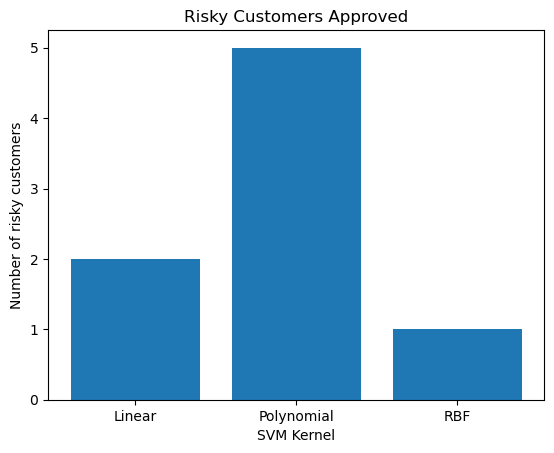

In [19]:
import matplotlib.pyplot as plt

models = ["Linear", "Polynomial", "RBF"]
risky_approved = [2,5,1]   # from your confusion matrices

plt.figure()
plt.bar(models, risky_approved)
plt.title("Risky Customers Approved")
plt.xlabel("SVM Kernel")
plt.ylabel("Number of risky customers")
plt.show()

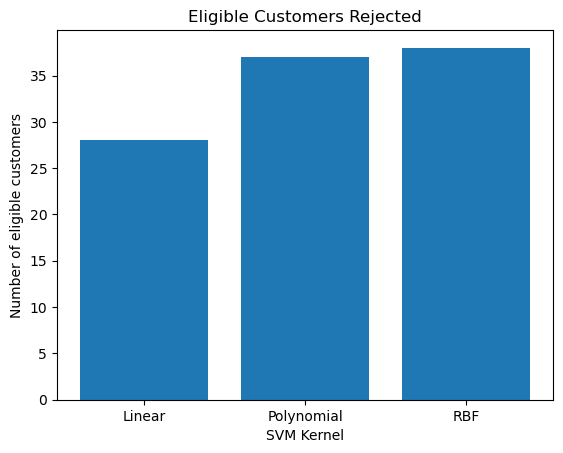

In [20]:
eligible_rejected = [28,37,38]  
plt.figure()
plt.bar(models, eligible_rejected)
plt.title("Eligible Customers Rejected")
plt.xlabel("SVM Kernel")
plt.ylabel("Number of eligible customers")
plt.show()